In [ ]:
import pandas as pd

df = pd.read_csv('/content/Task6.csv')

print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
# Drop the ID column from the DataFrame
df.drop('Id', axis=1, inplace=True)

target_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['Species'] = df['Species'].map(target_mapping)

print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        3
146            6.3           2.5            5.0           1.9        3
147            6.5           3.0            5.2           2.0        3
148            6.2           3.4            5.4           2.3        3
149            5.9           3.0            5.1           1.8        3

[150 rows x 5 columns]


In [ ]:
#independent variables
X = df.drop('Species', axis=1).copy()
print(X.shape)

#dependent variable
y = df['Species'].copy()
print(y.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'PetalWidthCm <= 1

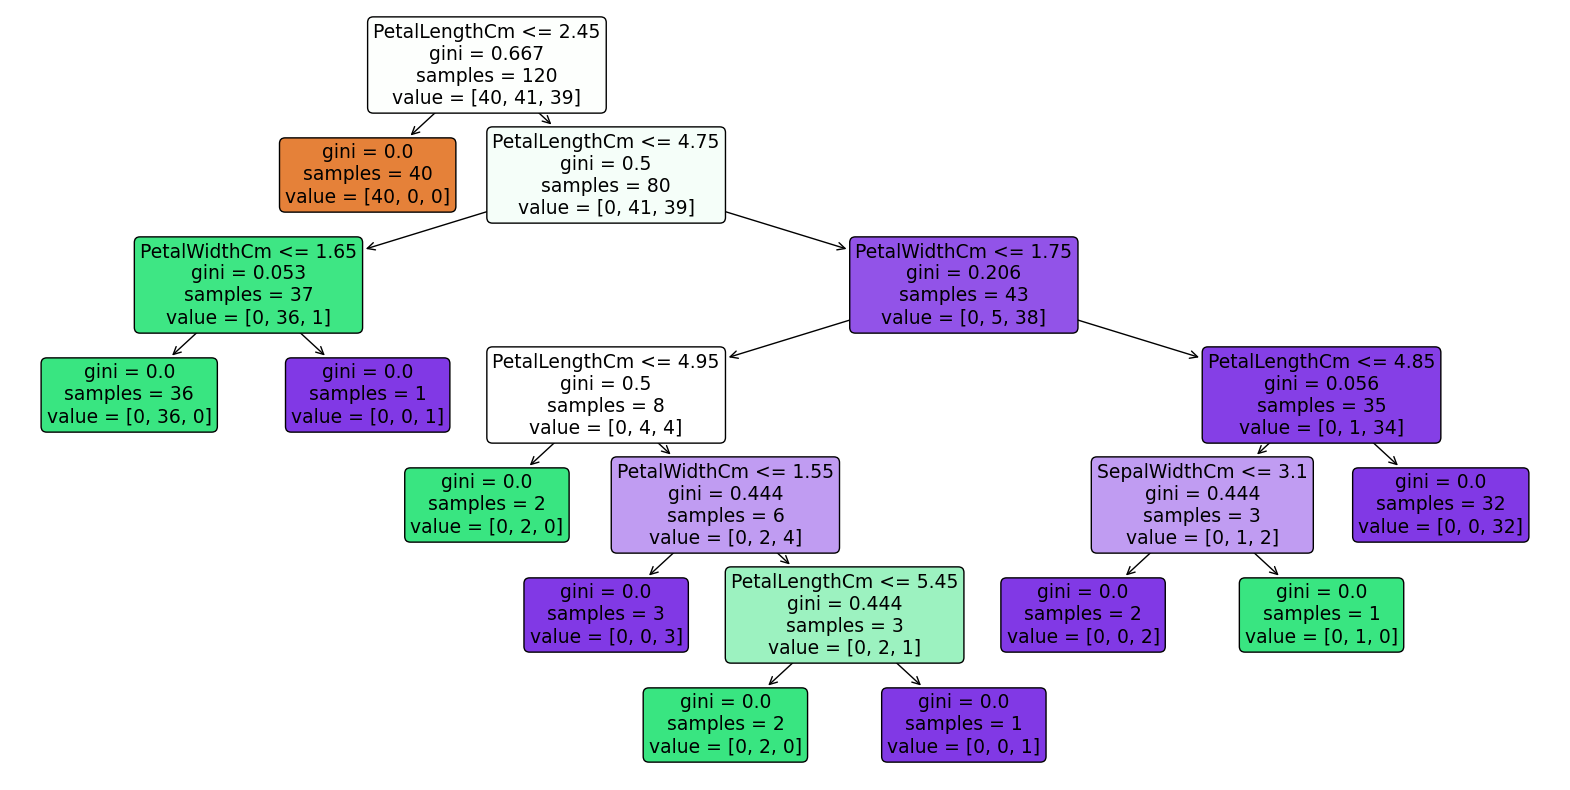

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#create a decision tree and fit it to the traiing data
clf=DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train,y_train)

plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,rounded=True,feature_names=X.columns)

Accuracy: 1.0


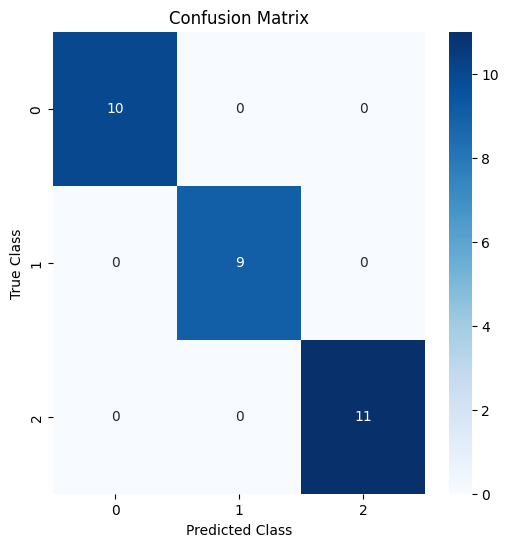

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the decision tree on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the confusion matrix of the decision tree on the test set
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()